# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
path = "/content/listings.csv"
df = pd.read_csv(path)

# Display the first few rows
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,257869,https://www.airbnb.com/rooms/257869,20250916040653,2025-09-16,previous scrape,House w/ Pool in Cultural District/close2downtown,No STR's! <br />Be my guest and enjoy everythi...,Very quiet neighborhood. <br />Tree lined stre...,https://a0.muscache.com/pictures/18939849/1e85...,1356081,...,4.97,4.96,4.92,NaN,f,1,1,0,0,2.26
1,299748,https://www.airbnb.com/rooms/299748,20250916040653,2025-09-16,previous scrape,Rosy's Guest House,"Quiet, ground floor studio apartment in a gorg...",Gorgeous historic homes with tree lined sidew...,https://a0.muscache.com/pictures/4eead819-7ad8...,1544441,...,4.98,4.96,4.96,NaN,f,1,1,0,0,2.17
2,912371,https://www.airbnb.com/rooms/912371,20250916040653,2025-09-16,city scrape,Stay in Ft.Worth Cultural District,"Quiet, studio, upstairs garage apartment surro...","This is a beautiful, safe, quiet neighborhood ...",https://a0.muscache.com/pictures/13577479/7098...,4895584,...,4.96,4.95,4.83,NaN,f,1,1,0,0,2.11
3,1885626,https://www.airbnb.com/rooms/1885626,20250916040653,2025-09-16,city scrape,Private bedroom in spacious home,"If you're like us, friendly Canadians, you jus...",This neighbourhood is very quiet and family or...,https://a0.muscache.com/pictures/37169857/d6f1...,7892516,...,4.98,4.92,4.96,NaN,f,1,0,1,0,0.69
4,2130492,https://www.airbnb.com/rooms/2130492,20250916040653,2025-09-16,city scrape,"Charming ""attic room"" by TCU campus",Our cozy 2-story home overlooks the TCU stadiu...,"This is a wonderfully friendly old, yet lively...",https://a0.muscache.com/pictures/54799567/0f33...,826752,...,5.00,4.98,5.00,NaN,f,2,0,2,0,0.31


## 2. Explore Missing Values

### Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

### Do the following:
Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



Top 10 columns with the most missing values:
                              Total Nulls  Percentage (%)
license                              2081      100.000000
calendar_updated                     2081      100.000000
neighbourhood_group_cleansed         2081      100.000000
neighbourhood                        1196       57.472369
neighborhood_overview                1196       57.472369
neighbourhood_cleansed               1069       51.369534
host_about                            944       45.362806
host_location                         632       30.370014
host_neighbourhood                    433       20.807304
review_scores_accuracy                364       17.491591


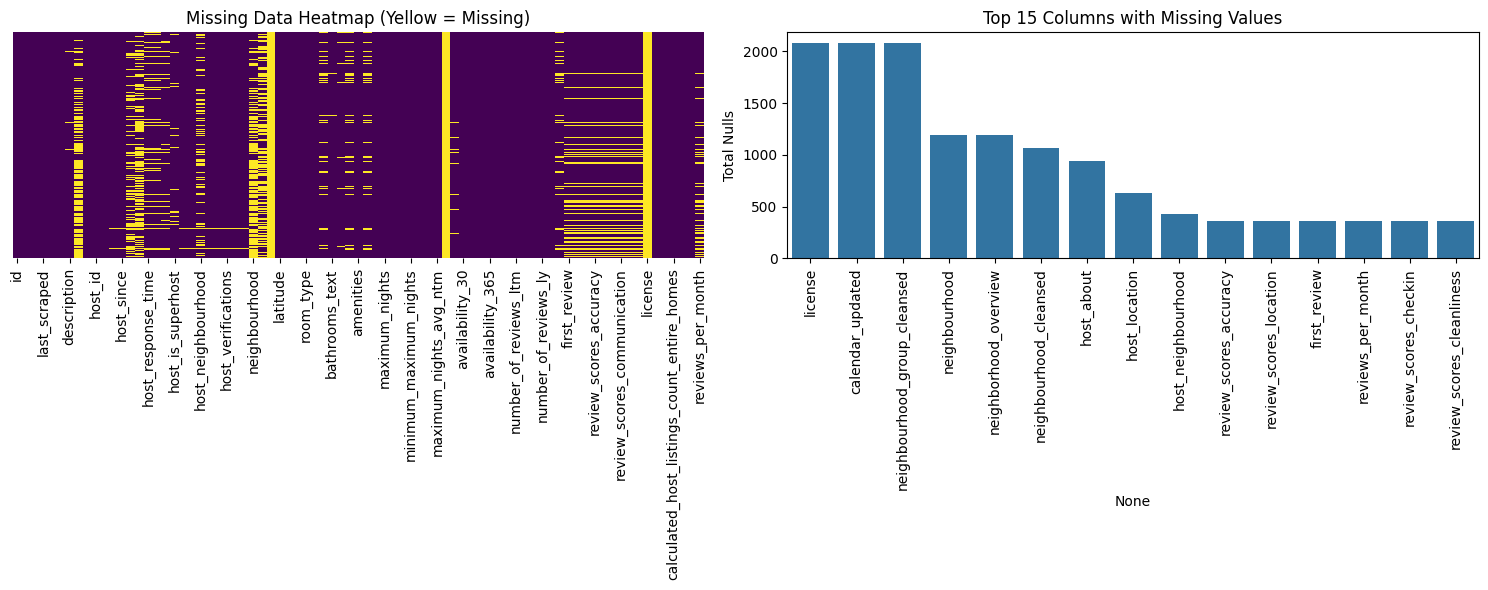

In [3]:
# 1. Count null values per column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Combine into a summary dataframe for easier viewing
missing_data = pd.DataFrame({
    'Total Nulls': null_counts,
    'Percentage (%)': null_percentages
}).sort_values(by='Total Nulls', ascending=False)

print("Top 10 columns with the most missing values:")
print(missing_data.head(10))

# 2. Visualizations
plt.figure(figsize=(15, 6))

# Heatmap of missing values
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (Yellow = Missing)')

# Bar chart for columns with most missing values
plt.subplot(1, 2, 2)
top_missing = missing_data[missing_data['Total Nulls'] > 0].head(15)
sns.barplot(x=top_missing.index, y=top_missing['Total Nulls'])
plt.xticks(rotation=90)
plt.title('Top 15 Columns with Missing Values')

plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. The top three colums with missing data are: License, calendar_updated, and neighbourhood_group_cleansed.

2. out of these variables with missing data, License and calendar_updated are most likely going to cause a business issue. These data points help give anaylists knowlage about the properties, without them they can not do their job correctly.  

3. The Nighbourhood_group_cleansed can be ignored/dropped without and issue. I do not see any scenrio where this variable plays a role in data anaylisis.


## 3. Drop Columns That Aren’t Useful

### Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

### Do the following:
Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [4]:
# Drop the specified columns
df = df.drop(columns=['neighbourhood_group_cleansed', 'neighbourhood_cleansed'])

# Confirm they are gone
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2081 non-null   int64  
 1   listing_url                                   2081 non-null   object 
 2   scrape_id                                     2081 non-null   int64  
 3   last_scraped                                  2081 non-null   object 
 4   source                                        2081 non-null   object 
 5   name                                          2081 non-null   object 
 6   description                                   2059 non-null   object 
 7   neighborhood_overview                         885 non-null    object 
 8   picture_url                                   2081 non-null   object 
 9   host_id                                       2081 non-null   i

### ✍️ Your Response: 🔧
1. I decided to drop the neighbourhood_group_cleansed, and neighbourhood_cleansed columns.

2. Both of these columns are one in the same. They do not add any value to the data, and they are missing tons of entries.

3. If these columns are left in, they could create confusion and skew the data. This is because they are very simialr, and are both missing tons of data entries.



## 4. Fill or Fix Values in Key Columns

### Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

### Do the following:
- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [5]:
# Fill missing values in specified columns with "unknown"
df['license'] = df['license'].fillna("unknown")
df['neighbourhood'] = df['neighbourhood'].fillna("unknown")

# Confirm the changes
print(df[['license', 'neighbourhood']].isnull().sum())
df[['license', 'neighbourhood']].head()

license          0
neighbourhood    0
dtype: int64


,license,neighbourhood
0,unknown,Neighborhood highlights
1,unknown,Neighborhood highlights
2,unknown,Neighborhood highlights
3,unknown,Neighborhood highlights
4,unknown,Neighborhood highlights


### ✍️ Your Response: 🔧
1. I chose to clean the license and neighbourhood Columns.

2. I chose to clean thse columns with the unknown methood. I did this because these columns can not be replaced with random data. The best thing we can do for these columns is to set the missing inputs as unknown and the procced to data analitics.

3. The risks involved with cleaning the data in this way are a potential missrepresentation of the data. For exsample, if we want to create a graph that shows where the most houses are located, we will be miss representing the truth because we only have 70% of the neighbourhood data points.


## 5. Convert and Clean Data Types

### Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

### Do the following:
- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [7]:
# Clean the price column: remove $, commas, and convert to numeric
df['price'] = df['price'].replace('[\\$,]', '', regex=True).astype(float)

# Fill any NaN prices (if any) with 0.0
df['price'] = df['price'].fillna(0.0)

# Check the results
print(df['price'].dtype)
print(df[['price']].head())

float64
   price
0    0.0
1    0.0
2   58.0
3   54.0
4  100.0


### ✍️ Your Response: 🔧
1. I fixed the price column.

2. I converted this column into a float rather than it being an object. This is because price is a number that can change over a large range.

3. Price is a very important part of this data set. Converting it to a float will allow me to run tests and compare values much easier than if it was an object.

## 6. Remove Duplicate Records

### Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

### Do the following:
- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [8]:
# Check for exact duplicate rows
exact_duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows: {exact_duplicates}")

# Check for duplicate IDs
duplicate_ids = df['id'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

# Remove duplicates if found
if exact_duplicates > 0 or duplicate_ids > 0:
    df = df.drop_duplicates(subset=['id'])
    print("Duplicates removed successfully.")
else:
    print("No duplicates found, dataset is clean.")

Number of exact duplicate rows: 0
Number of duplicate IDs: 0
No duplicates found, dataset is clean.


### ✍️ Your Response: 🔧 🔧
1. No, I did not find any duplicates.

2. There were no duplicates to drop or keep

3. Duplicates can be risky for Airbnb teams because they can create double bookings. If there is problems with bookings, guests will be upset and their opion of the app will decrease.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_6.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [9]:
# Export the cleaned dataset to a CSV file
df.to_csv('cleaned_airbnb_data_6.csv', index=False)

print("Cleaned data exported successfully as 'cleaned_airbnb_data_6.csv'.")

Cleaned data exported successfully as 'cleaned_airbnb_data_6.csv'.


## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. I found that the most surprising part of cleaning this dataset was all the missings values. I felt that data collected by Airbnb would already be cleaned.
2. I based my decision on what variables to clean on the importance of the variable. If I thought a variable would be important, I would fix it.
3. A business team might benifit from this cleaned data though the use of data anaylisis. They could use the cleaned data to get a better understanding of the market.   
4. If I had more time, I would analyize the data myself. I am really interested in realestate and think this is a cool concept.   
5. Just like I posted in Canvas, I am really intrested in realestate. Analysising data like this is exactly what my Canvas goal was.   


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [10]:
!jupyter nbconvert --to html "assignment_06_data_cleaning_TettelbachIan.ipynb"

[NbConvertApp] Converting notebook assignment_06_data_cleaning_TettelbachIan.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 479228 bytes to assignment_06_data_cleaning_TettelbachIan.html


# Task
Analyze the missing values in the Airbnb dataset loaded from "/content/listings.csv" by calculating the null count for each column and generating visualizations, including a missing value heatmap and a bar chart showing the columns with the highest number of missing values.

## analyze_and_visualize_missing_values

### Subtask:
Calculate null counts per column and create visualizations including a missing value heatmap and a bar chart of top missing columns.
